In [1]:
from skimage.io import imsave
import stackview

In [2]:
from story_writer import create_story_prompt, create_image_prompt, draw_image, prompt, package_story

In [3]:
story_prompt = create_story_prompt("""
A cat and a duck walking in the park. 
They come to a river. 
The cat is afraid of water. 
The duck offers that the cat can jump on her back and the duck would bring the cat to the other side of the river.
""", num_sentences=7, target_audience="6-year old kids")
story = prompt(story_prompt)

In [4]:
story

'One sunny day, Whiskers the cat and Daffy the duck were strolling through the park, chatting about their favorite snacks. Soon, they came upon a sparkling blue river, and Whiskers\'s fur stood on end; everyone knew he was scared of water. Daffy quacked with laughter at her friend\'s wide-eyed look and wiggled her tail feathers in a funny dance. "Why don\'t you hop on my back?" she offered, "I\'ll give you a ducky-back ride across!"\n\nWhiskers hesitated, but the thought of being a brave adventurer made his whiskers twitch with excitement. With a small leap, he landed on Daffy\'s back, and they set off, the gentle ripples tickling Whiskers\'s paws as they glided across. By the time they reached the other side, Whiskers was purring with pride, and they both couldn\'t help but giggle at their delightful river crossing adventure.'

StackViewNDArray([[[180, 198, 106],
                   [178, 197,  92],
                   [178, 204,  91],
                   ...,
                   [ 60, 203, 255],
                   [ 66, 200, 255],
                   [ 86, 199, 255]],

                  [[178, 191,  90],
                   [175, 202,  81],
                   [178, 208,  84],
                   ...,
                   [ 59, 204, 255],
                   [ 62, 199, 255],
                   [ 66, 198, 255]],

                  [[171, 189,  89],
                   [174, 195,  86],
                   [179, 208,  87],
                   ...,
                   [ 58, 202, 255],
                   [ 60, 203, 255],
                   [ 64, 203, 255]],

                  ...,

                  [[ 30, 166, 210],
                   [ 17, 162, 228],
                   [ 20, 169, 226],
                   ...,
                   [ 25, 172, 220],
                   [ 23, 167, 218],
                   [ 37, 161, 211]],

                  [[ 34, 149, 190],
                   [ 21, 171, 224],
                   [ 28, 164, 226],
                   ...,
                   [ 29, 167, 220],
                   [ 38, 167, 217],
                   [ 43, 162, 202]],

                  [[ 59, 132, 163],
                   [ 25, 133, 186],
                   [ 30, 144, 195],
                   ...,
                   [ 48, 163, 204],
                   [ 62, 165, 200],
                   [ 78, 142, 173]]], dtype=uint8)
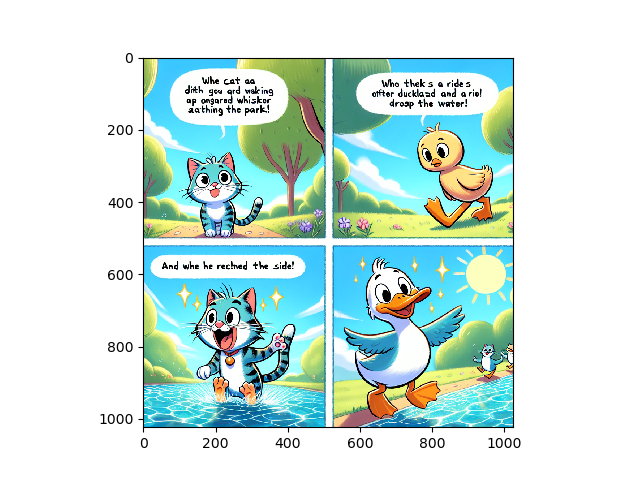
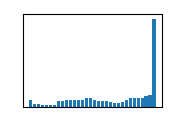

In [5]:
image_prompt = create_image_prompt(story)

image = draw_image(image_prompt)
stackview.insight(image)

In [6]:
image_filename = "temp.jpg"
imsave(image_filename, image)

In [7]:
title = prompt(f"Formulate a very short title of the following story: {story}")
title = title.replace("'", "").replace('"','')
title 

'Ducky-Back River Adventure'

In [8]:
package_story("pdfs/cat_duck_river.pdf", title, story, image_filename, story_prompt, image_prompt)

To visualize PDFs here, you need to install `pdf2image`, `poppler` and `stackview`, e.g. like this:
```
mamba install -c conda-forge poppler pdf2image stackview
```

StackViewNDArray([[[255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255],
                   ...,
                   [255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255]],

                  [[255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255],
                   ...,
                   [255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255]],

                  [[255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255],
                   ...,
                   [255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255]],

                  ...,

                  [[255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255],
                   ...,
                   [255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255]],

                  [[255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255],
                   ...,
                   [255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255]],

                  [[255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255],
                   ...,
                   [255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255]]], dtype=uint8)
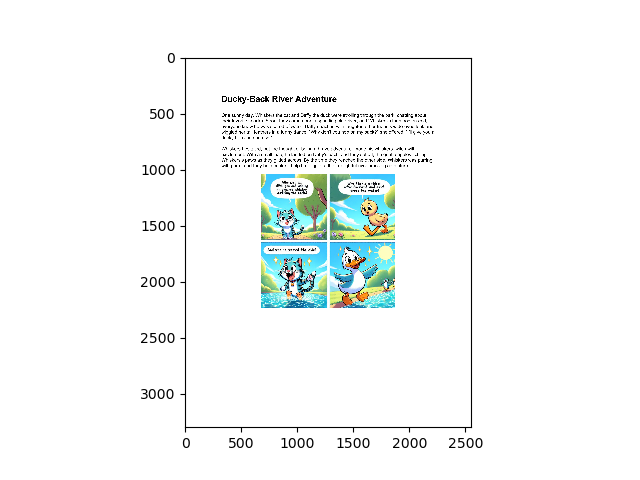
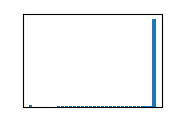

In [9]:
import stackview

def pdf_to_numpy(pdf_path, dpi=300):
    from pdf2image import convert_from_path
    import numpy as np

    np_images = []
    images = convert_from_path(pdf_path, dpi=dpi)
    for i, image in enumerate(images):
        image_np = np.array(image)
        np_images.append(image_np)

    return np.asarray(np_images)

images = pdf_to_numpy("pdfs/cat_duck_river.pdf")
stackview.insight(images[0])